# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv') 
display(query_1.info())
display(query_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

In [3]:
display(query_1)
display(query_3.sample(5))

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
83,Улан-Удэ,1.608696
16,Воронеж,2.000000
97,Элиста,4.870968
60,Оренбург,5.000000
20,Екатеринбург,11.322581


In [4]:
#проверка на пропуски
display(query_1.isnull().sum())
display(query_3.isnull().sum())

model             0
flights_amount    0
dtype: int64

city               0
average_flights    0
dtype: int64

In [5]:
#проверка на дубликаты
display(all(query_1.duplicated()))
display(all(query_3.duplicated()))

False

False

In [6]:
display(query_1.describe(), query_3.describe())

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


**Вывод**
- пропусков не обнаружено
- дубликатов нет
- типы данных корректны

In [7]:
#выбрать топ-10 городов по количеству рейсов
top_10 = query_3.sort_values(by='average_flights', ascending=False).head(10)
top_10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


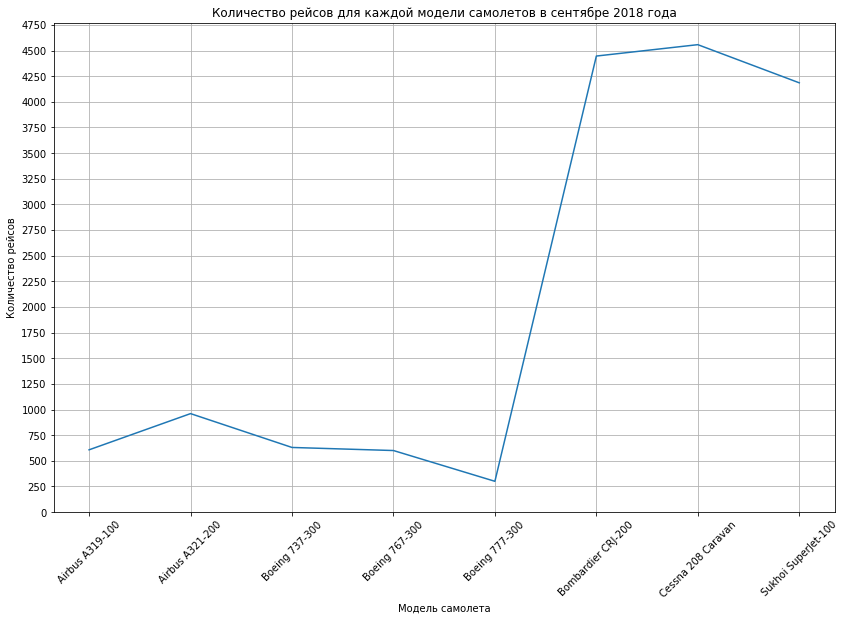

In [8]:
#график «Модели самолётов и количество рейсов»
plt.figure(figsize=[14,9])
plt.plot(query_1['model'], query_1['flights_amount'])
plt.xlabel("Модель самолета")
plt.ylabel("Количество рейсов")
plt.grid(b=True)
plt.xticks(rotation=45)
plt.yticks(list(range(0, query_1['flights_amount'].max()+250, 250)))
plt.title("Количество рейсов для каждой модели самолетов в сентябре 2018 года")
plt.show()

**Вывод по графику:**

В сентябре 2018 наиболее популярными среди самолётов были модели Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100.

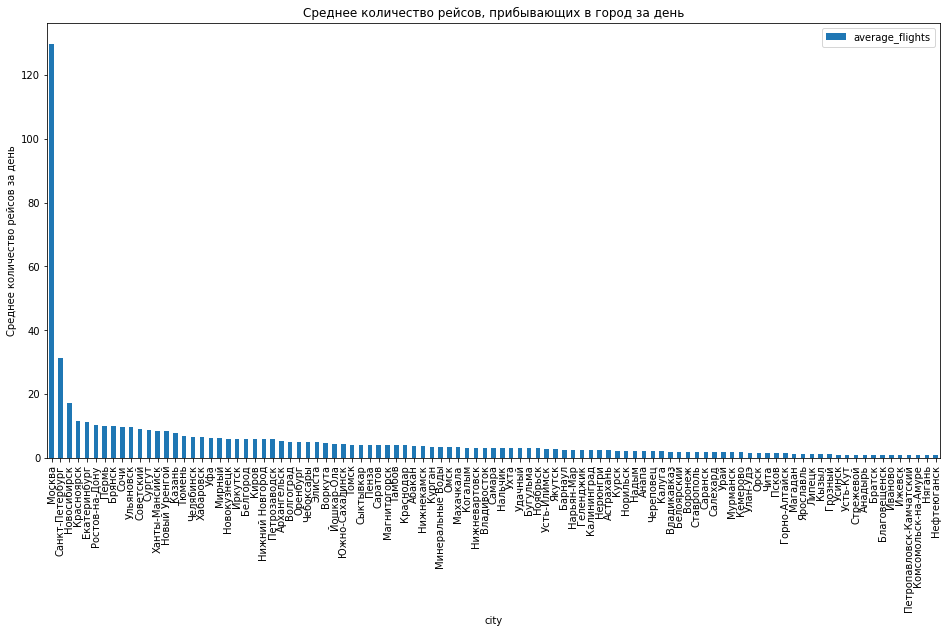

In [9]:
#график «Города и количество рейсов»
all_flights = query_3.sort_values(by='average_flights', ascending=False).set_index('city')

fig, ax = plt.subplots(1)
ax.set_title('Среднее количество рейсов, прибывающих в город за день')
ax.set_xlabel('Город')
ax.set_ylabel('Среднее количество рейсов за день')
all_flights.plot(kind='bar', figsize=(16,8), ax=ax)

**Вывод по графику:**

В сентябре 2018 наибольшее количество полетов было в Москву, Санкт-Петербург, Новосибирск.

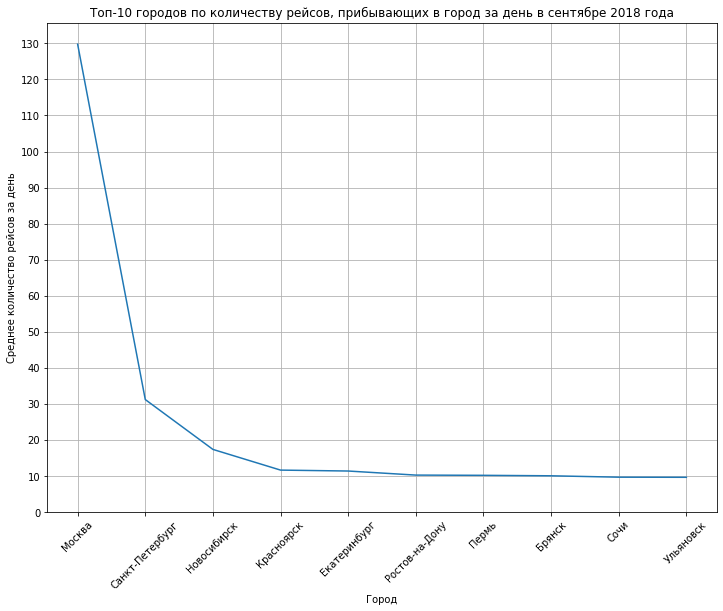

In [10]:
#график «Топ-10 городов и количество рейсов»

plt.figure(figsize=[12,9])
plt.plot(top_10['city'], top_10['average_flights'])
plt.xlabel("Город")
plt.ylabel("Среднее количество рейсов за день")
plt.grid(b=True)
plt.xticks(rotation=45)
plt.yticks(list(range(0, int(top_10['average_flights'].max()+10), 10)))
plt.title("Топ-10 городов по количеству рейсов, прибывающих в город за день в сентябре 2018 года")
plt.show()

**Вывод по графику:**

Москва имеет большое количество рейсов за день за счет большего количества аэропортов, чем у остальных городов.

# Общий вывод

В этом проекте были загружены и изучены данные двух файлов. Данные не имели пропусков, дубликатов, все типы данных были корректны.

Были построены графики показывающие модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.

В ходе работы над проектом был проанализирован спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.
Анализ показал, что наиболее популярные модели самолётов это Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100, это  говорит о том, какие модели наболее часто используются в стране.

Больше всего рейсов в Москве, Санкт-Петербурге, Новосибирске, так как это крупнейшие города в России и они являются важными воздушними узлами для международных полетов. Большинство перелетов в эти города происходят из-за пересадки на другой рейс для полета за границу.   

А Москва является бесспорным лидером по количеству рейсов за день, так как имеет наибольшее количество аэропортов во всей России.